In [4]:
from math import *
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from colour import *
import community
from community import community_louvain
import warnings
warnings.filterwarnings('ignore')
import geopy.distance
!pip install https://github.com/matplotlib/basemap/archive/master.zip


  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp37-cp37m-macosx_10_14_x86_64.whl size=121669849 sha256=434960f031196008651d971e7e997f27048a7cf365c94e826bf95baeb1833cff
  Stored in directory: /private/var/folders/0k/h7sfg8ms3316qj5by1855vym0000gn/T/pip-ephem-wheel-cache-96g5_c89/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
Successfully built basemap


In [5]:
from mpl_toolkits.basemap import Basemap

In [62]:
regional_airports_la = pd.DataFrame(columns = ['Airport Name', 'Code', 'Latitude', 'Longitude', 'Zip Code'])

regional_airports_la['Airport Name'] = ['Hollywood Burbank Airport',
                                        'Long Beach Airport',
                                        'Brackett Field',
                                        'Camarillo Airport',
                                        'Chino Airport',
                                        'El Monte Airport',
                                        'Fullerton Municipal Airport',
                                        'General William J. Fox Airfield',
                                        'Hawthorne Municipal Airport',
                                        'Oxnard Airport',
                                        'Palmdale Regional Airport',
                                        'Riverside Municipal Airport',
                                        'Santa Monica Airport',
                                        'Southern California Logistics Airport',
                                        'Van Nuys Airport',
                                        'Whiteman Airport',
                                        'Zamperini Field',
                                        'Agua Dulce Airpark',
                                        'Apple Valley Airport',
                                        'Cable Airport',
                                        'Catalina Airport',
                                        'Compton/Woodley Airport',
                                        'Corona Municipal Airport',
                                        'Flabob Airport',
                                        'Perris Valley Airport',
                                        'Relands Municipal Airport',
                                        'Santa Barbara Airport',
                                        'Rincon Island Vertiport',
                                        'San Diego International Airport']

regional_airports_la['Code'] = ['BUR',
                               'LGB',
                               'POC',
                                'CMA',
                               'CNO',
                               'EMT',
                               'FUL',
                               'WJF',
                               'HHR',
                               'OXR',
                               'PMD',
                               'RAL',
                               'SMO',
                               'VCV',
                               'VNY',
                               'WHP',
                               'TOA',
                               np.NaN,
                               'APV',
                               'CCB',
                               'AVX',
                               'CPM',
                               'AJO',
                               'RIR',
                               np.NaN,
                               'REI',
                               'SBA',
                               np.NaN,
                               'SAN']

regional_airports_la['Zip Code'] = [91505,
                                   90808,
                                   91750,
                                   93010,
                                   91710,
                                   91731,
                                   92833,
                                   93536,
                                   90250,
                                   93030,
                                   93550,
                                   92504,
                                   90405,
                                   92394,
                                   91406,
                                   91331,
                                   90505,
                                   91390,
                                   92307,
                                   91786,
                                   90704,
                                   90220,
                                   92880,
                                   92509,
                                   92570,
                                   92374,
                                   93117,
                                   31000,
                                   92101]

In [63]:
f = pd.read_csv('airports.dat.txt', header = None)
f = f.rename(columns = {0: 'ID', 1: 'Name', 2: 'City', 3: 'Country', 4: 'IATA', 5: 'ICAO', 6: 'Latitude', 7: 'Longitude',
         8: 'Altitude', 9: 'Timezone', 10: 'DST', 11: 'Tz Database Timzone', 12: 'Type', 13: 'Source'})
f = f[f['Country'] == 'United States']

In [64]:
#geographical data taken from https://openflights.org/data.html

latitudes = []
longitudes = []
for i in regional_airports_la['Code']:
    iata_code = i
    if iata_code == np.NaN:
        icao_code = np.NaN
    else:
        icao_code = "K" + str(iata_code)
    try: 
        current_code_index = f[f['IATA'] == iata_code].index[0]
    except:
        try:
            current_code_index = f[f['ICAO'] == icao_code].index[0]
        except: current_code_index = 'MISSING'
    if current_code_index == 'MISSING':
        latitudes.append('MISSING')
        longitudes.append('MISSING')
    else:
        latitudes.append(f.loc[current_code_index]['Latitude'])
        longitudes.append(f.loc[current_code_index]['Longitude'])
regional_airports_la['Latitude'] = latitudes
regional_airports_la['Longitude'] = longitudes

In [65]:
regional_airports_la.iloc[17, 2] = 34.5038813; regional_airports_la.iloc[17, 3] = -118.3136901; 
regional_airports_la.iloc[18, 2] = 34.5733; regional_airports_la.iloc[18, 3] = -117.1904;
regional_airports_la.iloc[21, 2] = 33.887329784; regional_airports_la.iloc[21,3] = -118.239499042;
regional_airports_la.iloc[22, 2] = 33.891996432; regional_airports_la.iloc[22,3] = -117.601497594;
regional_airports_la.iloc[24, 2] = 33.7587802982; regional_airports_la.iloc[24,3] = -117.218065794;
regional_airports_la.iloc[27, 2] = 34.3477; regional_airports_la.iloc[27,3] = -119.4453;
lax = pd.DataFrame(data = {'Airport Name': ['Los Angeles Airport'], 'Code': ['LAX'], 'Latitude': [33.942791], 'Longitude': [-118.410042], 'Zip Code': [90045]})
regional_airports_la = pd.concat([regional_airports_la, lax], axis = 0, ignore_index = True)

In [66]:
regional_airports_la

,Airport Name,Code,Latitude,Longitude,Zip Code
0,Hollywood Burbank Airport,BUR,34.2007,-118.359,91505
1,Long Beach Airport,LGB,33.8177,-118.152,90808
2,Brackett Field,POC,34.0916,-117.782,91750
3,Camarillo Airport,CMA,34.2137,-119.094,93010
4,Chino Airport,CNO,33.9747,-117.637,91710
5,El Monte Airport,EMT,34.0861,-118.035,91731
6,Fullerton Municipal Airport,FUL,33.872,-117.98,92833
7,General William J. Fox Airfield,WJF,34.7411,-118.219,93536
8,Hawthorne Municipal Airport,HHR,33.9228,-118.335,90250
9,Oxnard Airport,OXR,34.2008,-119.207,93030


In [67]:
regional_airports_la = regional_airports_la.set_index('Airport Name')

In [68]:
#run this cell to convert to a CSV file
regional_airports_la.to_csv('regional_airport_network.csv')

In [69]:
#create a dictionary of latitudes and longitudes for graphing purposes
lat_lon_dict_airports = {}
for k in range(len(regional_airports_la)):
    lat_lon_dict_airports[regional_airports_la.index[k]] = (regional_airports_la.iloc[k]['Longitude'], 
                                                                  regional_airports_la.iloc[k]['Latitude'])
    

In [276]:
regional_airports_la_network = nx.DiGraph()
#lax_index = regional_airports_la[regional_airports_la['Airport Name'] == 'Los Angeles Airport'].index[0]
for i in regional_airports_la.index:
    #if i != 'Los Angeles Airport':
    regional_airports_la_network.add_edge('Los Angeles Airport', i)

In [121]:
xlim = [regional_airports_la['Longitude'].min() - 0.15, regional_airports_la['Longitude'].max() + 0.15]
ylim = [regional_airports_la['Latitude'].min() -0.1, regional_airports_la['Latitude'].max() +0.1]

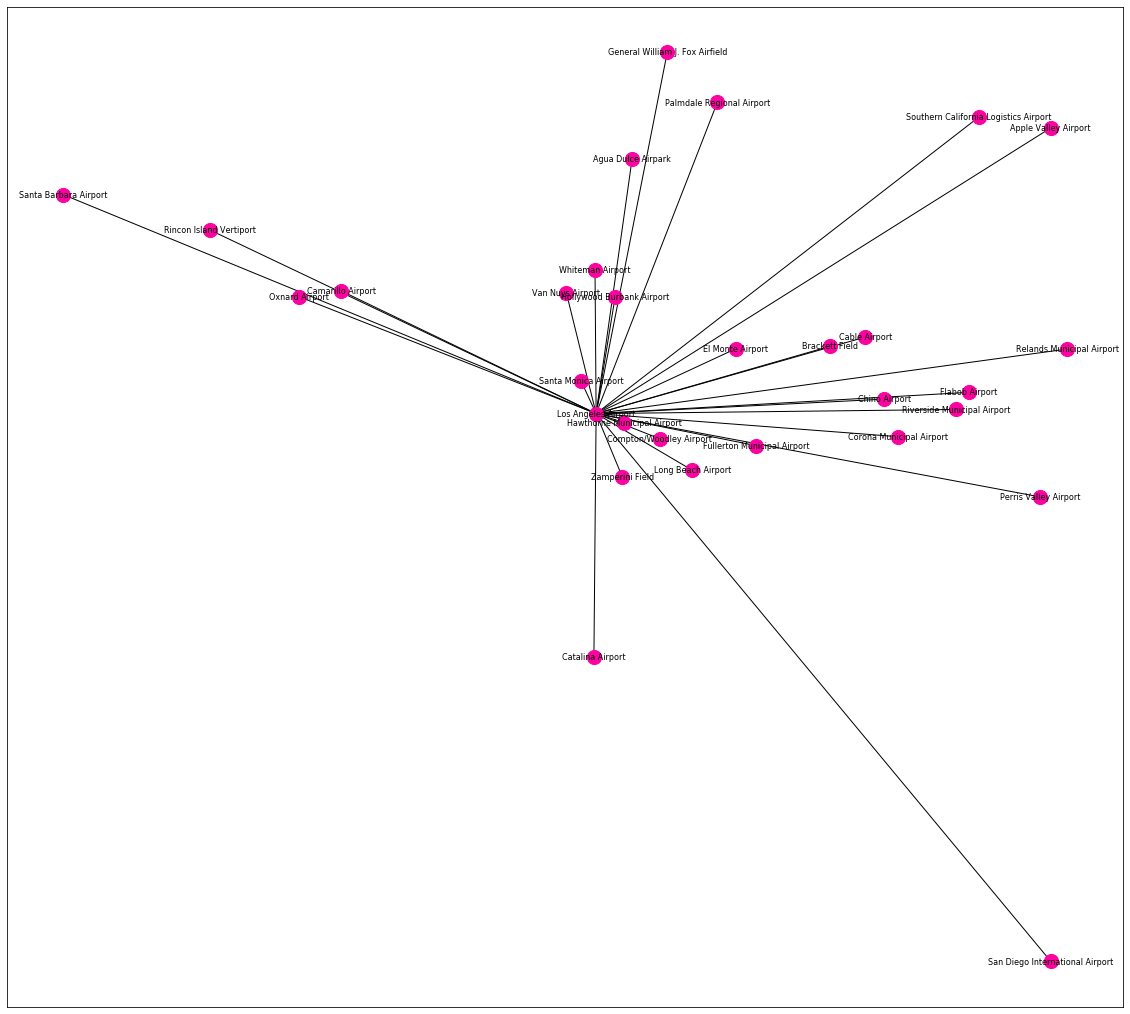

In [128]:
plt.subplots(figsize = (20, 18.4))
nx.draw_networkx(regional_airports_la_network, pos = lat_lon_dict_airports, node_size = 200, 
                 node_color = '#fc03a1', font_size = 8, alpha = 1)
plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])
plt.savefig('possible_locations.png', transparent= True, bbox_inches = 'tight', pad_inches = 0, dpi = 300)

In [83]:
lax_raw_data = pd.read_csv('2015_LAX_RawSurveyData.csv', header = [1])

la_county_zip_codes = pd.read_csv('la_county_zipcodes.csv')
sb_county_zip_codes = pd.read_csv('sb_county_zipcodes.csv', header = None)
sd_county_zip_codes = pd.read_csv('sd_county_zipcodes.csv', header = None)

la_county_zip_codes = la_county_zip_codes['ZIPCODE']
sb_county_zip_codes = sb_county_zip_codes[0]
sd_county_zip_codes = sd_county_zip_codes[0]

list_zip_codes = lax_raw_data['Zip_Final'] 

list_zip_codes = list_zip_codes.dropna()

In [15]:
def return_subset(original_list, subset_list):
    subset = [i for i in original_list if i in subset_list]
    return subset

In [86]:
#just getting zip codes from people in LA, SB, and SD counties
la_survey_zipcodes = return_subset(list_zip_codes, list(la_county_zip_codes))

sb_survey_zipcodes = return_subset(list_zip_codes, list(sb_county_zip_codes))

sd_survey_zipcodes = return_subset(list_zip_codes, list(sd_county_zip_codes))

In [92]:
#make dictionary of demand by zip-code
zip_code_dict = {}
for i in la_survey_zipcodes:
    if i in zip_code_dict:
        zip_code_dict[int(i)] += 1
    else:
        zip_code_dict[int(i)] = 1
        
for j in sb_survey_zipcodes:
    if j in zip_code_dict:
        zip_code_dict[int(j)] += 1
    else:
        zip_code_dict[int(j)] = 1

for k in sd_survey_zipcodes:
    if k in zip_code_dict:
        zip_code_dict[int(k)] += 1
    else:
        zip_code_dict[int(k)] = 1

In [108]:
zip_codes_latlon = pd.read_csv('zipcode_latlong_database.csv', header = None)
zip_codes_latlon = zip_codes_latlon.rename(columns = {0:'Zip Code', 1:'Latitude', 2:'Longitude'})

rincon_island = {'Zip Code': 31000, 'Latitude': 34.3477, 'Longitude': -119.4453}
zip_codes_latlon.append(rincon_island, ignore_index = True)
zip_codes_lat_lon = zip_codes_latlon.set_index('Zip Code')

In [110]:
lat_lon_dict_zipcode = {}
for k in zip_codes_lat_lon.index:
    lat_lon_dict_zipcode[k] = (zip_codes_lat_lon.loc[k]['Longitude'], 
                               zip_codes_lat_lon.loc[k]['Latitude'])

In [114]:
demand_network_nodes = nx.Graph()
for aa in zip_code_dict:
    demand_network_nodes.add_node(aa)

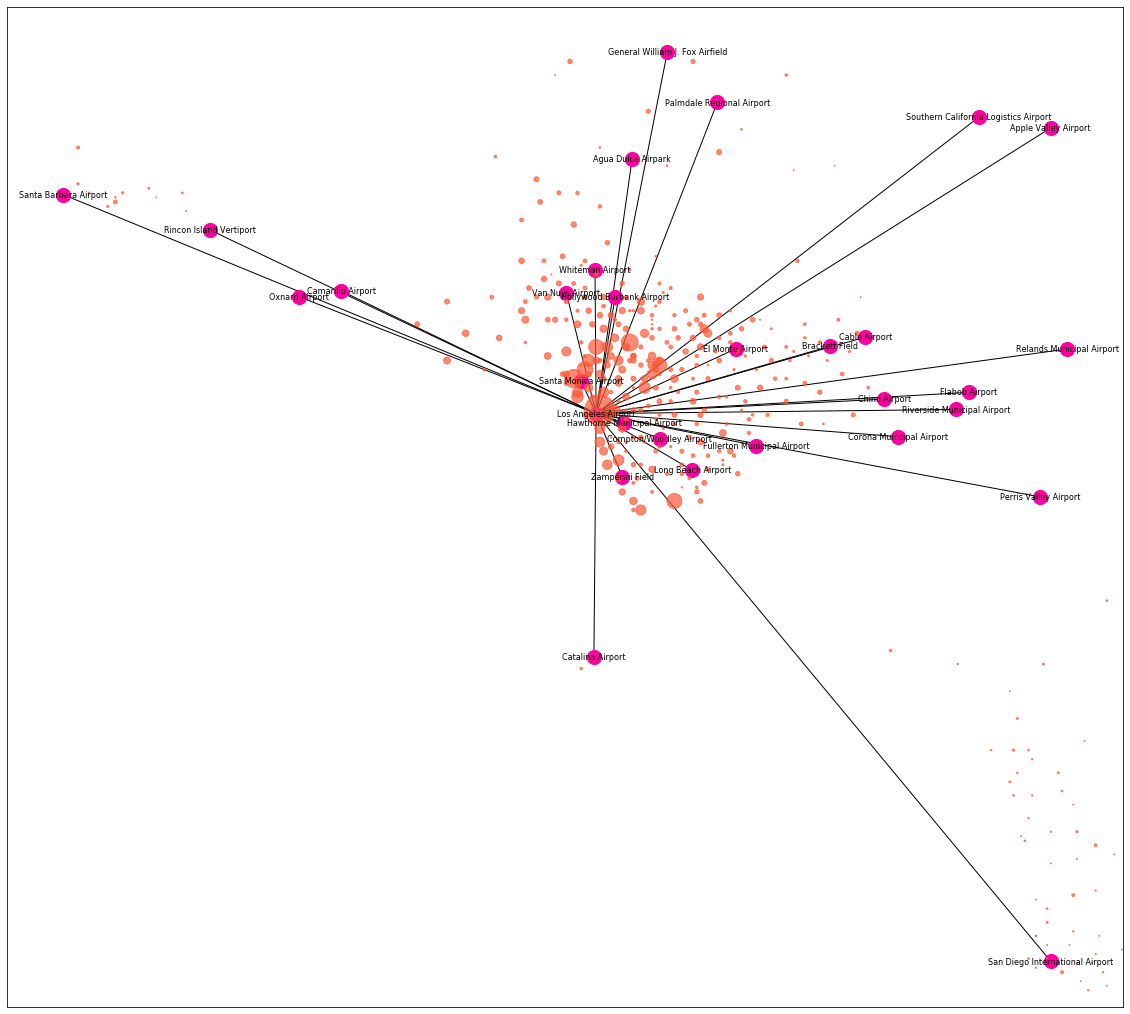

In [127]:
plt.subplots(figsize = (20, 18.4))
nx.draw_networkx(regional_airports_la_network, pos = lat_lon_dict_airports, node_size = 200, 
                 node_color = '#fc03a1', font_size = 8, alpha = 1)
nx.draw_networkx(demand_network_nodes, pos = lat_lon_dict_zipcode, 
                 node_size = [s for s in list(zip_code_dict.values())], 
                 node_color = '#ff5736', with_labels = False, alpha = 0.7)
plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])
plt.savefig('demand_network.png', transparent= True, bbox_inches = 'tight', pad_inches = 0, dpi = 300)
plt.show()

In [133]:
#define variables that need to be added to in for-loop
distances_dictionary = {}
zipcodes_dictionary = {}
zipcodes_serviced_list = []

for ii in regional_airports_la['Zip Code'].index: #change name later to be more descriptive
    current_zip_code = regional_airports_la.loc[ii]['Zip Code']
    airport_lat = regional_airports_la.loc[ii]['Latitude']
    airport_lon = regional_airports_la.loc[ii]['Longitude']
    
    current_airport_distances = []
    zip_codes_serviced_current = []
    zipcodes_serviced_list_current = []
    for jj in zip_code_dict:
        #set conditions (i.e., 91 zip codes will only be compared with other 91-starting zip codes)
#         mod_airport = current_zip_code % 1000
#         leftover_airport = (current_zip_code - mod_airport)/1000
#         mod_zipcode = jj % 1000
#         leftover_zipcode = (jj - mod_zipcode)/1000
        
#         if leftover_airport == leftover_zipcode:
        zipcode_lat = lat_lon_dict_zipcode[jj][1]
        zipcode_lon = lat_lon_dict_zipcode[jj][0]
        #next line: creates a tuple of zip code, and distance between that zip code and airport
        current_distance = geopy.distance.distance((airport_lat, airport_lon),
                                                    (zipcode_lat, zipcode_lon)).miles
        if current_distance < 13:
            current_airport_distances.append(current_distance)
            zip_codes_serviced_current.append(jj)
            zipcodes_serviced_list_current.append(jj)
                
    distances_dictionary[ii] = current_airport_distances
    zipcodes_dictionary[ii] = zip_codes_serviced_current
    zipcodes_serviced_list.append(zipcodes_serviced_list_current)

In [136]:
zip_codes_serviced_flat = [item for sublist in zipcodes_serviced_list for item in sublist]
zip_codes_serviced_flat = np.array(zip_codes_serviced_flat)
zip_codes_serviced_flat_unique = np.unique(zip_codes_serviced_flat)

In [152]:
#find the zip codes not serviced -- TO DO: highlight in red later
zipcodes_not_serviced_la = list(set(np.unique(la_survey_zipcodes)) - set(zip_codes_serviced_flat_unique))
zipcodes_not_serviced_sb = list(set(np.unique(sb_survey_zipcodes)) - set(zip_codes_serviced_flat_unique))
zipcodes_not_serviced_sd = list(set(np.unique(sd_survey_zipcodes)) - set(zip_codes_serviced_flat_unique))
zipcodes_not_serviced = zipcodes_not_serviced_la + zipcodes_not_serviced_sb + zipcodes_not_serviced_sd

In [155]:
def get_shortest_distance(zipcode, airport):
    idx = np.where(np.array(zipcodes_dictionary[airport]) == zipcode)[0][0]
    distance_matching = distances_dictionary[airport][idx]
    return distance_matching

closest_airport_distance_dict = {}
closest_airport_name_dict = {}
for kk in zip_codes_serviced_flat_unique:
    shortest_distance = 13
    closest_airport = 'None'
    for xx in regional_airports_la.index:
        current_list = zipcodes_dictionary[xx]
        if kk in current_list:
            matched_distance = get_shortest_distance(kk, xx)
            if matched_distance < shortest_distance:
                shortest_distance = matched_distance
                closest_airport = xx
    closest_airport_distance_dict[kk] = shortest_distance
    closest_airport_name_dict[kk] = closest_airport

In [156]:
closest_airport_name_dict_copy = closest_airport_name_dict

for i in zipcodes_not_serviced:
    closest_airport_name_dict_copy[int(i)] = 'None'

#get unique values of the dictionary using set
uniqueAirportValues = set(closest_airport_name_dict_copy.values())

In [209]:
#create color map of airport groups
palette_husl = sns.color_palette('husl', 10)
palette_colorblind = sns.color_palette('colorblind', 10)
palette_pastel = sns.color_palette('pastel', 3)
color_value_dict = {}
count = 0
for i in uniqueAirportValues:
    if count < 10:
        color_value_dict[i] = palette_husl[count]
        count += 1
    elif count > 20:
        color_value_dict[i] = palette_pastel[count-21]
        count += 1
    else:
        color_value_dict[i] = palette_colorblind[count-11]
        count += 1
color_value_dict['None'] = (0.98039, 0.18431, 0.12549)

In [211]:
#match up zip codes with the color of the airport that services the zip code
zipcode_color_dict = {}
for zz in zip_code_dict:
    closest_airport_2 = closest_airport_name_dict[zz]
    color_to_use = color_value_dict[closest_airport_2]
    zipcode_color_dict[zz] = color_to_use
colorlist = list(zipcode_color_dict.values())

In [212]:
list_airports_nodes = list(regional_airports_la_network)
airport_color_list = {}
for vv in list_airports_nodes:
    if vv in color_value_dict:
        airport_color_list[vv] = color_value_dict[vv]
    else:
        airport_color_list[vv] = color_value_dict['None']
        
airport_color_list_actually_a_list = list(airport_color_list.values())

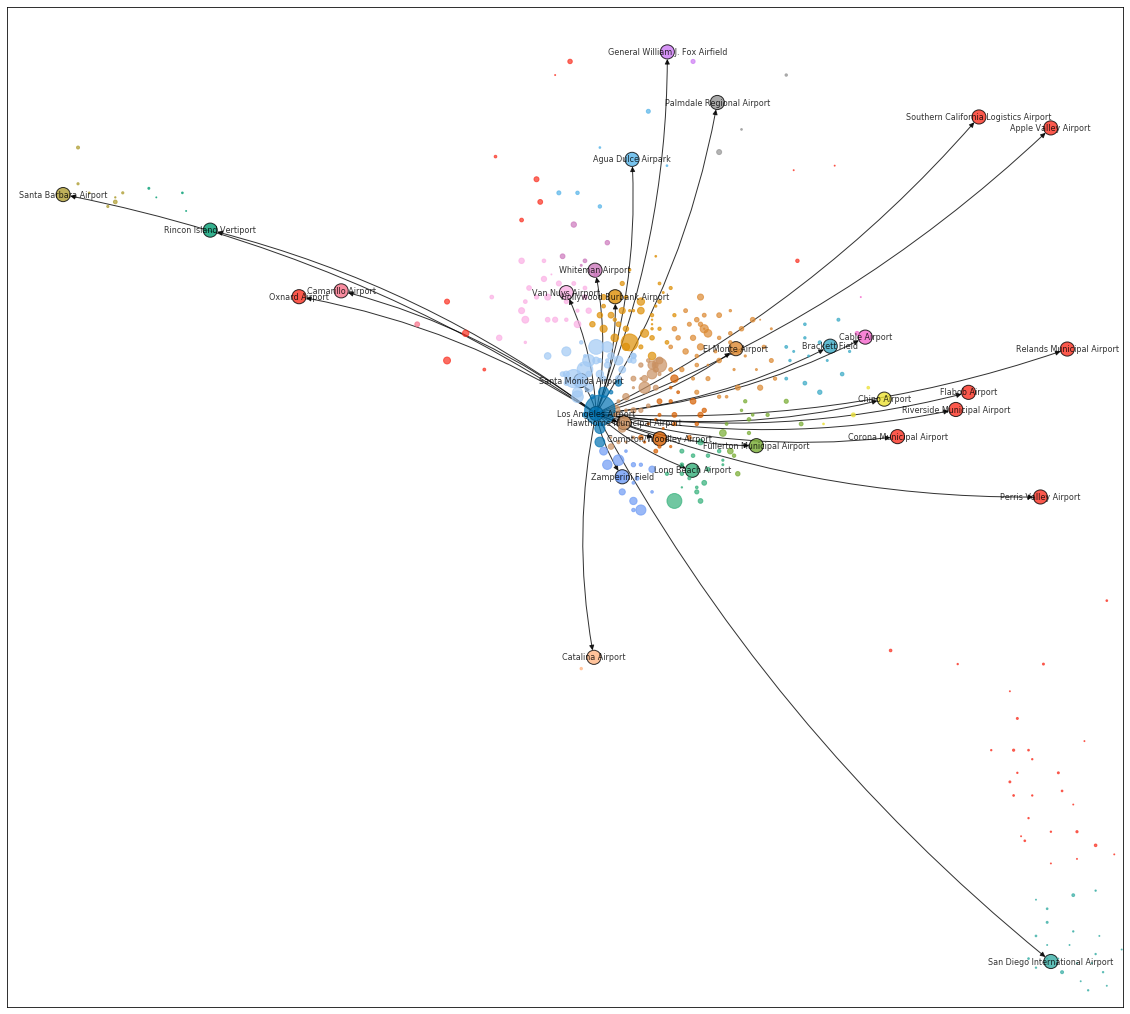

In [279]:
fig, ax = plt.subplots(figsize = (20, 18.4))
nx.draw_networkx(regional_airports_la_network, pos = lat_lon_dict_airports, node_size = 200, 
                 node_color = airport_color_list_actually_a_list, font_size = 8, alpha = 0.8, 
                 ax = ax, edgecolors = 'black', connectionstyle='arc3, rad = 0.1')
nx.draw_networkx(demand_network_nodes, pos = lat_lon_dict_zipcode, 
                 node_size = [s for s in list(zip_code_dict.values())], 
                 node_color = colorlist, with_labels = False, alpha = 0.7, ax = ax)
plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])
plt.savefig('network.png', transparent= True, bbox_inches = 'tight', pad_inches = 0, dpi = 300)
plt.show()


In [238]:
empty_airport_dict = {}
for airport in uniqueAirportValues:
    empty_airport_dict[airport] = []

In [240]:
for airport_2 in empty_airport_dict:
    for zipcode_2 in closest_airport_name_dict:
        if airport_2 == closest_airport_name_dict[zipcode_2]:
            empty_airport_dict[airport_2].append(zipcode_2)

In [282]:
passenger_demand = pd.DataFrame(columns = ['Airport', 'Percent Passengers (%)', 'Total Potential Passengers per Year'])
airport_names_list = []
percent_passengers_list = []
total_passengers_list = []

for airport_3 in empty_airport_dict:
    zipcodes_served = empty_airport_dict[airport_3]
    airport_names_list.append(airport_3)
    current_sum = 0;
    for bb in zipcodes_served:
        num_pass = zip_code_dict[bb]
        current_sum += num_pass
    current_percent = current_sum/len(lax_raw_data)*100
    current_potential_total = (current_percent/100)*43777129
    percent_passengers_list.append(round(current_percent, 2))
    total_passengers_list.append(int(round(current_potential_total, 0)))

passenger_demand['Airport'] = airport_names_list
passenger_demand['Percent Passengers (%)'] = percent_passengers_list
passenger_demand['Total Potential Passengers per Year'] = total_passengers_list
passenger_demand = passenger_demand.set_index('Airport')

In [283]:
passenger_demand

,Percent Passengers (%),Total Potential Passengers per Year
Airport,,
Camarillo Airport,0.10,44410
El Monte Airport,3.45,1511887
Santa Barbara Airport,0.19,83028
Fullerton Municipal Airport,0.92,401625
Long Beach Airport,1.98,865039
San Diego International Airport,0.24,106199
Brackett Field,0.52,225914
Zamperini Field,2.73,1193290
General William J. Fox Airfield,0.07,32825
